In [1]:
import numpy as np
import pandas as pd
import math

In [148]:
saks = pd.read_csv('saks_processed.csv')

In [3]:
saks.head()

,website,brand_name,product_name,category,department,original_price,discount_price,order,percent_off,private_label,brand_mean,brand_positioning
0,Saks,Eton,Grid Check Dress Shirt,dress-shirts,men,250.0,175.0,1,30.0,Non-Private,260.457143,Contemporary
1,Saks,Eton,Floral Lightweight Cotton Dress Shirt,dress-shirts,men,295.0,206.5,2,30.0,Non-Private,260.457143,Contemporary
2,Saks,Eton,Check Dress Shirt,dress-shirts,men,250.0,175.0,5,30.0,Non-Private,260.457143,Contemporary
3,Saks,Eton,Contemporary-Fit Linen-Blend Check Dress Shirt,dress-shirts,men,295.0,206.5,6,30.0,Non-Private,260.457143,Contemporary
4,Saks,Eton,Vertical Stripe Dress Shirt,dress-shirts,men,225.0,157.5,7,30.0,Non-Private,260.457143,Contemporary


In [141]:
off5th = pd.read_csv('off5th_processed.csv')

In [142]:
off5th = off5th[['website','brand_name','product_name','category','department',
        'original_price','discount_price','order','percent_off',
        'private_label','brand_mean','brand_positioning']]

In [6]:
combined = saks.append(off5th)

In [81]:
combined.groupby('website').mean()

,original_price,discount_price,order,percent_off,brand_mean
website,,,,,
Off5th,530.460340,171.714081,1536.564273,62.611917,530.460340
Saks,815.819128,343.363021,1322.842818,55.881662,815.819128


In [7]:
combined.sample(10)

,website,brand_name,product_name,category,department,original_price,discount_price,order,percent_off,private_label,brand_mean,brand_positioning
3783,Off5th,Sho,Sequin Embellished Cowlneck Gown,dresses,women,288.0,99.99,2157,65.28,Non-Private,288.000000,Contemporary
1869,Off5th,Alice + Olivia,Elza Silk Maxi Dress,dresses,women,440.0,139.99,3811,68.18,Non-Private,492.464196,Contemporary
2418,Saks,Aidan by Aidan Mattox,Long-Sleeve Sequin Cocktail Dress,dresses,women-s-apparel,245.0,98.00,1679,60.00,Non-Private,231.052632,Contemporary
41,Saks,Eton,Contemporary-Fit Textured Solid Dress Shirt,dress-shirts,men,260.0,182.00,101,30.00,Non-Private,260.457143,Contemporary
3279,Saks,St. John,Sequined Evening Knit Dress,dresses,women-s-apparel,1195.0,478.00,2295,60.00,Non-Private,1416.951220,Luxury
1360,Saks,Cinq à Sept,Iris Plunging Twist High-Low Gown,dresses,women-s-apparel,795.0,317.99,3087,60.00,Non-Private,451.166667,Contemporary
3844,Off5th,Tre by Natalie Ratabesi,The Angelique Dress,dresses,women,2700.0,479.99,2463,82.22,Non-Private,2700.000000,Luxury
3515,Off5th,Michael Kors Collection,Dance-Print Silk Shirtdress,dresses,women,2690.0,899.99,2353,66.54,Non-Private,2427.777778,Luxury
1431,Off5th,Alexia Admor,Strapless Ruffle Sheath Dress,dresses,women,199.0,69.99,1121,64.83,Non-Private,235.750000,Contemporary
3150,Saks,Pamella Roland,Liquid Sequin Cocktail Dress,dresses,women-s-apparel,2990.0,1196.00,2256,60.00,Non-Private,4470.000000,Luxury


In [8]:
combined_melt = pd.melt(combined,id_vars=['website','brand_name','product_name','category','brand_positioning','private_label'],
                        value_vars=['original_price','discount_price','percent_off'])

In [9]:
combined_melt.head()

,website,brand_name,product_name,category,brand_positioning,private_label,variable,value
0,Saks,Eton,Grid Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,250.0
1,Saks,Eton,Floral Lightweight Cotton Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,295.0
2,Saks,Eton,Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,250.0
3,Saks,Eton,Contemporary-Fit Linen-Blend Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,295.0
4,Saks,Eton,Vertical Stripe Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,225.0


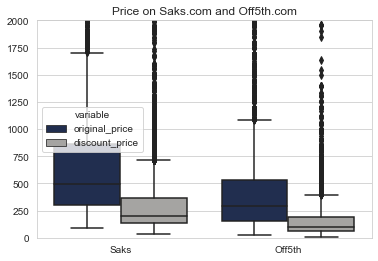

In [10]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=combined_melt.loc[combined_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 2000))
ax.set(ylabel='',xlabel='',title = 'Price on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("price_by_site.png")
fig.savefig("price_by_site.pdf")

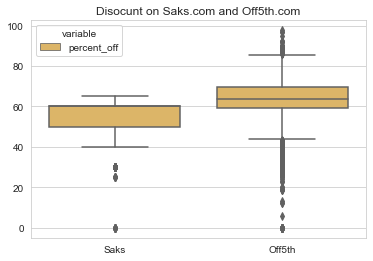

In [11]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=combined_melt.loc[combined_melt['variable']=='percent_off'], 
                 palette=['#f0bc54'])
# ax.set(ylim=(0, 2000))
ax.set(ylabel='',xlabel='',title = 'Disocunt on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("discount_by_site.png")
fig.savefig("discount_by_site.pdf")

In [80]:
import plotly.figure_factory as ff

saks_ = combined.loc[combined['website']=='Saks']['discount_price']
off5th_ = combined.loc[combined['website']=='Off5th']['discount_price']

hist_data = [saks_, off5th_]
group_labels = ['Saks', 'Off5th']
colors = ['rgb(25, 43, 87)','rgb(166, 164, 161)'] #'rgb(240, 188, 84)',

fig = ff.create_distplot(hist_data, group_labels, bin_size=30, colors= colors)
fig.update_layout(title_text='Discount Price Distribution On Saks.com and Off5th.com',
                  plot_bgcolor='rgb(256, 256, 256)',
                  xaxis=dict(range=[0,2400])) #end at 3500-ish
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [79]:
import plotly.figure_factory as ff

saks_ = combined.loc[combined['website']=='Saks']['original_price']
off5th_ = combined.loc[combined['website']=='Off5th']['original_price']

hist_data = [saks_, off5th_]
group_labels = ['Saks', 'Off5th']
colors = ['rgb(25, 43, 87)','rgb(166, 164, 161)'] #'rgb(240, 188, 84)',

fig = ff.create_distplot(hist_data, group_labels, bin_size=75, colors= colors)
fig.update_layout(title_text='Original Price Distribution On Saks.com and Off5th.com',
                  plot_bgcolor='rgb(256, 256, 256)',
                  xaxis=dict(range=[0,6000])) #end at 10000-ish)
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [310]:
price_only = combined_melt.loc[combined_melt['variable']!='percent_off']
bins = list(range(0,1500,50))
bins = bins + [5000]


In [311]:
price_only['backet'] = pd.cut(price_only['value'],bins)
basket = price_only.groupby(['variable','backet']).count()[['value']].reset_index()
basket.head()

,variable,backet,value
0,discount_price,"(0, 50]",991
1,discount_price,"(50, 100]",2122
2,discount_price,"(100, 150]",1481
3,discount_price,"(150, 200]",1431
4,discount_price,"(200, 250]",699


In [66]:
original = price_only[price_only['variable']=='original_price']
discount = price_only[price_only['variable']=='discount_price']
original.head()

,website,brand_name,product_name,category,brand_positioning,private_label,variable,value,backet
0,Saks,Eton,Grid Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,250.0,"(200, 250]"
1,Saks,Eton,Floral Lightweight Cotton Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,295.0,"(250, 300]"
2,Saks,Eton,Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,250.0,"(200, 250]"
3,Saks,Eton,Contemporary-Fit Linen-Blend Check Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,295.0,"(250, 300]"
4,Saks,Eton,Vertical Stripe Dress Shirt,dress-shirts,Contemporary,Non-Private,original_price,225.0,"(200, 250]"


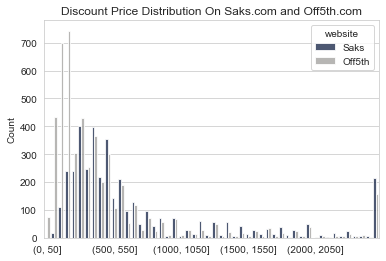

In [73]:
import seaborn as sns
ax = sns.countplot(x="backet",hue="website", data=original, dodge=True, 
                   palette=['#192b57','#a6a4a1'], alpha=0.8)
ax.set(ylabel='Count',xlabel='',title = 'Discount Price Distribution On Saks.com and Off5th.com')
# ax.set_width(0.2)
# ax.set_xticks([0,500,1000,1500,2000,2500])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig = ax.get_figure()
fig.savefig("basket.pdf")

Text(0.5, 1.0, 'Scatter Plot of Original Price and Percentage Off')

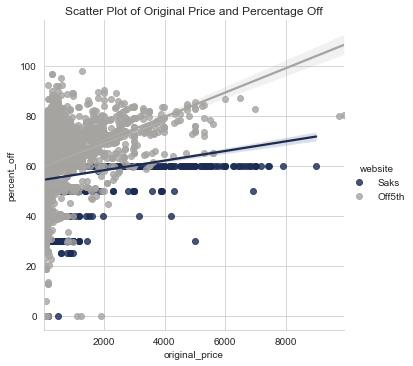

In [99]:
import matplotlib.pyplot as plt
sns.lmplot(data=combined,x='original_price',
                y='percent_off',hue='website',
                palette=['#192b57','#a6a4a1']) #,alpha=0.5
sns.set_style("whitegrid")
plt.title('Scatter Plot of Original Price and Percentage Off')
# plt.savefig("discount_by_site.png")
# plt.savefig("discount_by_site.pdf")

Text(0.5, 1.0, 'Scatter Plot of Original Price and Percentage Off')

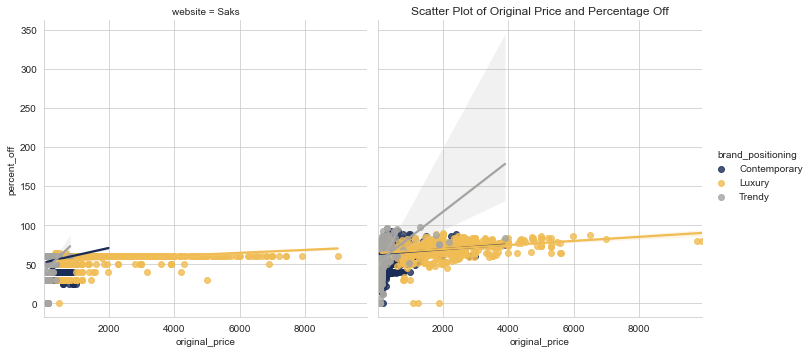

In [102]:
import matplotlib.pyplot as plt
sns.lmplot(data=combined,x='original_price',y='percent_off',
           hue='brand_positioning', col='website',
           palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Scatter Plot of Original Price and Percentage Off')
# plt.savefig("discount_by_site.png")
# plt.savefig("discount_by_site.pdf")

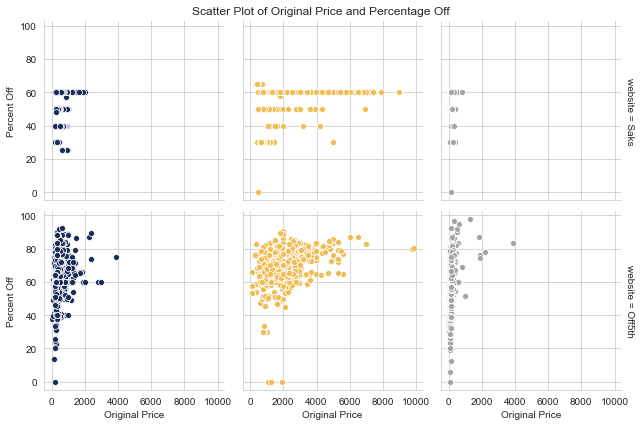

In [134]:
# sns.set_theme(style="whitegrid", palette="muted")

g = sns.FacetGrid(combined, col = 'brand_positioning', row = 'website',
                  hue = 'brand_positioning',
                  palette=['#192b57','#f0bc54','#a6a4a1'],
                  margin_titles=True) #,palette=['#192b57','#a6a4a1']
g.map(sns.scatterplot, 'original_price','percent_off')
g.fig.suptitle('Scatter Plot of Original Price and Percentage Off')
g.set(xlabel='Original Price',ylabel='Percent Off',title = '')

g.savefig("scatter_by_brand.png")
g.savefig("scatter_by_brand.pdf")

In [136]:
combined.sample(6)

,website,brand_name,product_name,category,department,original_price,discount_price,order,percent_off,private_label,brand_mean,brand_positioning
1927,Saks,AMUR,Floral Pleated Halterneck Dress,dresses,women-s-apparel,598.0,239.20,286,60.00,Non-Private,615.058824,Contemporary
2166,Saks,Theia,Lace Bell-Sleeve Shift Dress,dresses,women-s-apparel,650.0,259.99,2709,60.00,Non-Private,828.750000,Contemporary
1679,Off5th,Parker,Geometric-Print Mini Dress,dresses,women,448.0,69.99,2485,84.38,Non-Private,358.673077,Contemporary
204,Saks,Isaia,Slim-Fit Grid Dress Shirt,dress-shirts,men,495.0,247.50,180,50.00,Non-Private,533.272727,Luxury
1178,Off5th,Elie Tahari,Azra Belted Sheath Dress,dresses,women,398.0,158.99,1555,60.05,Non-Private,417.090909,Contemporary
3908,Off5th,RACHEL Rachel Roy,Asymmetrical Leopard-Print Dress,dresses,women,129.0,39.99,2875,69.00,Non-Private,129.000000,Trendy


In [146]:
offbrand = off5th['brand_name'].unique().tolist()

In [150]:
saksbrand = saks['brand_name'].unique().tolist()

In [153]:
common_brands = list(set(offbrand).intersection(set(saksbrand)))

In [156]:
common = combined.loc[combined['brand_name'].isin(common_brands)]

In [157]:
exclusive = combined.loc[~combined['brand_name'].isin(common_brands)]

In [158]:
common.shape

(6557, 12)

In [159]:
exclusive.shape

(2543, 12)

In [160]:
combined.shape

(9100, 12)

In [181]:
exclusive.groupby(['website']).mean()[['original_price','discount_price','percent_off']]

,original_price,discount_price,percent_off
website,,,
Off5th,252.985825,90.469060,60.056372
Saks,909.408703,385.565973,54.445410


In [182]:
common.groupby(['website']).mean()[['original_price','discount_price','percent_off']]

,original_price,discount_price,percent_off
website,,,
Off5th,702.628263,222.125149,64.197587
Saks,799.702909,336.095630,56.128986


In [164]:
combined.groupby(['website']).agg(['count','mean'])[['original_price','discount_price','percent_off']]

original_price             discount_price             percent_off  \
                 count        mean          count        mean       count   
website                                                                     
Off5th            5111  530.460340           5111  171.714081        5111   
Saks              3989  815.819128           3989  343.363021        3989   

                    
              mean  
website             
Off5th   62.611917  
Saks     55.881662

In [166]:
combined.loc[combined['brand_name'].isin(common_brands),'exclusivity'] = 'Shared'
combined.loc[~combined['brand_name'].isin(common_brands),'exclusivity'] = 'Exclusive'

In [167]:
combined.head()

,website,brand_name,product_name,category,department,original_price,discount_price,order,percent_off,private_label,brand_mean,brand_positioning,exclusivity
0,Saks,Eton,Grid Check Dress Shirt,dress-shirts,men,250.0,175.0,1,30.0,Non-Private,260.457143,Contemporary,Shared
1,Saks,Eton,Floral Lightweight Cotton Dress Shirt,dress-shirts,men,295.0,206.5,2,30.0,Non-Private,260.457143,Contemporary,Shared
2,Saks,Eton,Check Dress Shirt,dress-shirts,men,250.0,175.0,5,30.0,Non-Private,260.457143,Contemporary,Shared
3,Saks,Eton,Contemporary-Fit Linen-Blend Check Dress Shirt,dress-shirts,men,295.0,206.5,6,30.0,Non-Private,260.457143,Contemporary,Shared
4,Saks,Eton,Vertical Stripe Dress Shirt,dress-shirts,men,225.0,157.5,7,30.0,Non-Private,260.457143,Contemporary,Shared


In [184]:
combined.groupby(['website','exclusivity']).agg(['count','mean'])[['original_price','discount_price']]

original_price             discount_price            
                             count        mean          count        mean
website exclusivity                                                      
Off5th  Exclusive             1957  252.985825           1957   90.469060
        Shared                3154  702.628263           3154  222.125149
Saks    Exclusive              586  909.408703            586  385.565973
        Shared                3403  799.702909           3403  336.095630

In [220]:
ex_counts = combined.loc[combined['exclusivity']=='Exclusive'].groupby(['website','brand_positioning'])['brand_name'].count().reset_index()
ex_counts['percent'] = [0.42,0.02,0.55,0.33,0.48,0.18]
ex_counts

,website,brand_positioning,brand_name,percent
0,Off5th,Contemporary,825,0.42
1,Off5th,Luxury,44,0.02
2,Off5th,Trendy,1088,0.55
3,Saks,Contemporary,195,0.33
4,Saks,Luxury,284,0.48
5,Saks,Trendy,107,0.18


In [222]:
total_counts = combined.groupby(['website','brand_positioning']).count()[['brand_name']].reset_index()
total_counts['percent'] = [0.54,0.13,0.32,0.65,0.28,0.08]
total_counts

,website,brand_positioning,brand_name,percent
0,Off5th,Contemporary,2779,0.54
1,Off5th,Luxury,677,0.13
2,Off5th,Trendy,1655,0.32
3,Saks,Contemporary,2585,0.65
4,Saks,Luxury,1104,0.28
5,Saks,Trendy,300,0.08


In [235]:
combined.loc[combined['brand_positioning']=='Luxury','brand_name'].unique()

array(['Isaia', 'Ralph Lauren Purple Label', 'Brioni', 'Kiton',
       'Ermenegildo Zegna', 'Charvet', 'Thom Browne', 'Versace',
       'Palm Angels', 'Loro Piana', 'Marcelo Burlon',
       'Versace Jeans Couture', 'Neil Barrett', 'Brandon Maxwell',
       'Silvia Tcherassi', 'Rick Owens', 'Escada', 'Lela Rose',
       'Proenza Schouler', 'Carolina Herrera', 'Comme des Garcons',
       'Jacquemus', 'Agua By Agua Bendita', 'Zimmermann', 'Paco Rabanne',
       'Akris punto', 'Akris', 'Marina Moscone', 'Alexandre Vauthier',
       'Herve Leger', 'Burberry', 'Alaïa', 'Stella McCartney', 'Marni',
       'Cushnie', 'Balmain', 'Talbot Runhof', 'Rosetta Getty', 'Loewe',
       'Dolce & Gabbana', 'Safiyaa', 'Marchesa', 'Khaite',
       'Prabal Gurung', 'Rosie Assoulin', 'Michael Kors Collection',
       'Johanna Ortiz', 'Haney', 'Jason Wu Collection',
       'Oscar de la Renta', 'Wandering', 'Runway Marc Jacobs',
       'Ralph Lauren Collection', 'Altuzarra', 'Moschino', 'Black Iris',
       'O

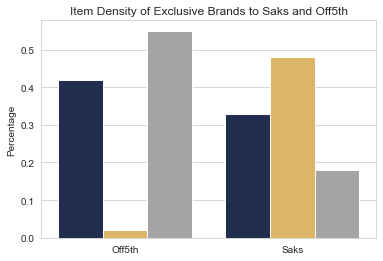

In [355]:
sns.barplot(x="website", y="percent", hue="brand_positioning", data=ex_counts,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Item Density of Exclusive Brands to Saks and Off5th')
plt.xlabel('')
plt.ylabel('Percentage')
plt.savefig("exclusive_counts.png")
plt.savefig("exclusive_counts.pdf")

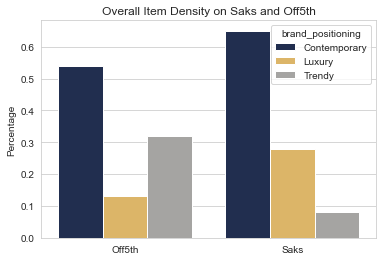

In [354]:
sns.barplot(x="website", y="percent", hue="brand_positioning", data=total_counts,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Overall Item Density on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Percentage')
plt.savefig("all_counts.png")
plt.savefig("all_counts.pdf")

In [309]:
ex_price = exclusive.groupby(['website','brand_positioning'])[['original_price','discount_price','percent_off']].mean().reset_index()
ex_price
sh_price = common.groupby(['website','brand_positioning'])[['original_price','discount_price','percent_off']].mean().reset_index()
sh_price

IndentationError: unexpected indent (<ipython-input-309-1a53d2782ec1>, line 4)

Text(0, 0.5, 'Count')

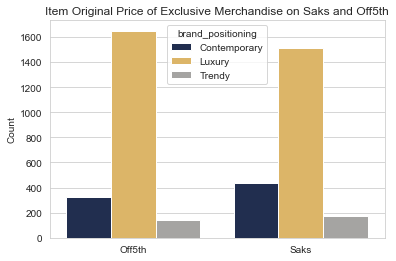

In [204]:
sns.barplot(x="website", y="original_price", hue="brand_positioning", data=ex_price,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Item Original Price of Exclusive Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

Text(0, 0.5, 'Count')

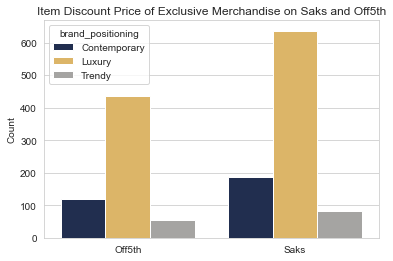

In [205]:
sns.barplot(x="website", y="discount_price", hue="brand_positioning", data=ex_price,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Item Discount Price of Exclusive Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

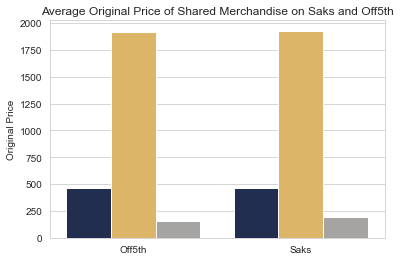

In [237]:
sns.barplot(x="website", y="original_price", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Average Original Price of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Original Price')
plt.savefig("shared_oripri.png")
plt.savefig("shared_oripri.pdf")

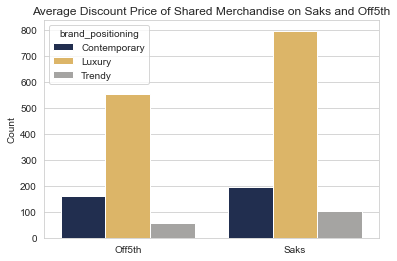

In [238]:
sns.barplot(x="website", y="discount_price", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Average Discount Price of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
plt.savefig("shared_dispri.png")
plt.savefig("shared_dispri.pdf")

Text(0, 0.5, 'Count')

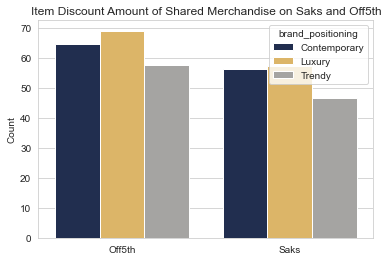

In [212]:
sns.barplot(x="website", y="percent_off", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Item Discount Amount of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

In [340]:
off = (combined.groupby(['website','exclusivity','brand_name'])
       .agg(['mean'])['percent_off'].reset_index()
       .sort_values('exclusivity',ascending=False)
       .groupby(['exclusivity','website']).mean().reset_index()
       .sort_values('exclusivity',ascending=False))
off

,exclusivity,website,mean
2,Shared,Off5th,65.121175
3,Shared,Saks,57.041343
0,Exclusive,Off5th,60.673154
1,Exclusive,Saks,57.536907


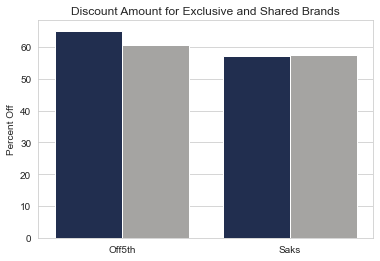

In [353]:
sns.barplot(x="website", y="mean", hue="exclusivity", data=off,
            palette=['#192b57','#a6a4a1'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Discount Amount for Exclusive and Shared Brands')
plt.xlabel('')
plt.ylabel('Percent Off')
plt.savefig("off_ex.png")
plt.savefig("off_ex.pdf")

In [348]:
brand_off = combined.groupby(['website','exclusivity','brand_name']).agg(['mean'])['percent_off'].reset_index()
exclu = brand_off.loc[brand_off['exclusivity']=='Exclusive','mean']
nonex = brand_off.loc[brand_off['exclusivity']!='Exclusive','mean']

In [349]:
print(stats.ttest_ind(exclu, nonex))

Ttest_indResult(statistic=-2.196354810524573, pvalue=0.028367512199998137)


In [254]:
from scipy import stats
print(stats.ttest_ind(exclu, nonex))

Ttest_indResult(statistic=-4.8212477622782695, pvalue=1.4497516196873565e-06)


In [350]:
saks_ex = brand_off.loc[(brand_off['exclusivity']=='Exclusive') & (brand_off['website']=='Saks'),'mean']
saks_non = brand_off.loc[(brand_off['exclusivity']!='Exclusive') & (brand_off['website']=='Saks'),'mean']
print(stats.ttest_ind(saks_ex, saks_non))

Ttest_indResult(statistic=0.7448556874266962, pvalue=0.4569022533245518)


In [352]:
off_ex = brand_off.loc[(brand_off['exclusivity']=='Exclusive') & (brand_off['website']!='Saks'),'mean']
off_non = brand_off.loc[(brand_off['exclusivity']!='Exclusive') & (brand_off['website']!='Saks'),'mean']
print(stats.ttest_ind(off_ex, off_non))

Ttest_indResult(statistic=-4.665352832378476, pvalue=4.101870082448996e-06)


In [329]:
combined.groupby(['brand_name','exclusivity']).count()['website'].reset_index().groupby('exclusivity').count()

,brand_name,website
exclusivity,,
Exclusive,337,337
Shared,213,213


In [330]:
### import plotly.graph_objects as go

labels = ['Shared Brands','Exclusive Brand']
values = [213, 337]
colors = ['rgb(25, 43, 87)','rgb(220, 220, 220)']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [263]:
sak_w_con = saks.loc[(saks['brand_positioning']=='Contemporary') & (saks['department']!='men'),'product_name']
sak_w_con

558          Talita Short-Sleeve Dress
559                 Zadie Jersey Dress
560           Gaelle Ruffle Mini Dress
561          Double Gauze Tiered Dress
562       Striped Tie-Waist Midi Dress
                     ...              
3954             Scarf Tie Shift Dress
3955    Asymmetrical Mixed Print Dress
3956    Asymmetrical Mixed Print Dress
3957        Printed Ruffle Flare Dress
3958               Micro-Pleated Dress
Name: product_name, Length: 2221, dtype: object

In [265]:
off_w_con = off5th.loc[(off5th['brand_positioning']=='Contemporary') & (off5th['department']!='men'),'product_name']
off_lux

151                    Cotton Jersey Dress Shirt
152     Checkered Regular-Fit Cotton Dress Shirt
153         Contemporary-Fit Striped Dress Shirt
154                          Spread Collar Shirt
426                 French-Collar Jacquard Shirt
                          ...                   
5012                     Comfort-Fit Dress Shirt
5013                     Comfort-Fit Dress Shirt
5014                        Slim-Fit Dress Shirt
5015       Slim-Fit Embroidered Logo Dress Shirt
5016           Slim-Fit Point-Collar Dress Shirt
Name: product_name, Length: 677, dtype: object

In [266]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
#create the countvectorizer obj
cnt_vec = CountVectorizer()
cnt_vec_data = cnt_vec.fit_transform(sak_w_con)
#to create the features for text as a separate dataframe
df = pd.DataFrame(cnt_vec_data.todense(), columns=cnt_vec.get_feature_names())

In [267]:
df

,20,21,24,25,3d,70s,abba,abeline,abella,abigail,...,zibeline,zig,zigzag,zip,zoe,zoey,zolina,zosia,zoya,zuzanna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
kw1 = np.sum(df,axis=0).sort_values(ascending=False).head(50)

In [281]:
cnt_vec = CountVectorizer()
cnt_vec_data = cnt_vec.fit_transform(off_w_con)
#to create the features for text as a separate dataframe
df2 = pd.DataFrame(cnt_vec_data.todense(), columns=cnt_vec.get_feature_names())
kw2 = np.sum(df2,axis=0).sort_values(ascending=False).head(50)

In [288]:
kw1 = kw1.reset_index()

In [287]:
kw2 = kw2.reset_index()

In [291]:
kwpair = pd.merge(kw1,kw2,how='outer',on='index')
kwpair

,index,0_x,0_y
0,dress,1885.0,1828.0
1,floral,311.0,370.0
2,sleeve,284.0,211.0
3,mini,282.0,291.0
4,midi,272.0,175.0
5,gown,188.0,343.0
6,print,188.0,218.0
7,silk,172.0,201.0
8,sheath,162.0,193.0
9,wrap,137.0,154.0


In [293]:
kwpair[(kwpair['0_y'].isna())|(kwpair['0_x'].isna())]

,index,0_x,0_y
13,puff,128.0,NaN
25,belted,67.0,NaN
26,leopard,65.0,NaN
31,jacquard,58.0,NaN
40,flounce,45.0,NaN
41,slip,45.0,NaN
44,velvet,42.0,NaN
46,waist,39.0,NaN
47,bodycon,38.0,NaN
49,shirt,36.0,NaN


In [296]:
kwpair[kwpair['0_y'].isna()].rename(columns={'index':'keywords','0_x':'Saks','0_y':'Off5th'})

,keywords,Saks,Off5th
13,puff,128.0,NaN
25,belted,67.0,NaN
26,leopard,65.0,NaN
31,jacquard,58.0,NaN
40,flounce,45.0,NaN
41,slip,45.0,NaN
44,velvet,42.0,NaN
46,waist,39.0,NaN
47,bodycon,38.0,NaN
49,shirt,36.0,NaN


In [301]:
combined.loc[combined['private_label']=='Private Label'].groupby('website').mean()[['original_price','discount_price','percent_off']]

,original_price,discount_price,percent_off
website,,,
Off5th,153.255994,49.636222,57.571676
Saks,192.202247,96.101011,50.000000


In [302]:
combined[combined['brand_positioning']=='Trendy'].groupby('website').mean()[['original_price','discount_price','percent_off']]

,original_price,discount_price,percent_off
website,,,
Off5th,145.579577,55.660284,56.916018
Saks,188.841667,96.452500,47.733800


In [303]:
combined['private_label'].value_counts()

Non-Private      8659
Private Label     441
Name: private_label, dtype: int64